In [3]:
import numpy as np
import pickle 
from utils import *
from model import *
from keras.datasets import cifar10
from keras.utils import np_utils
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, UpSampling2D, Dropout
from keras import metrics
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt
import numpy as np 


In [4]:
with open('./history/SNR_2_prediction.pkl', 'rb') as file:
    y = pickle.load(file, encoding = 'latin')

In [5]:
y_pred = y['1']
y_true = y['2']

In [6]:
with open ('./class_dict' , 'rb') as file:
    classes = pickle.load(file, encoding ='latin')

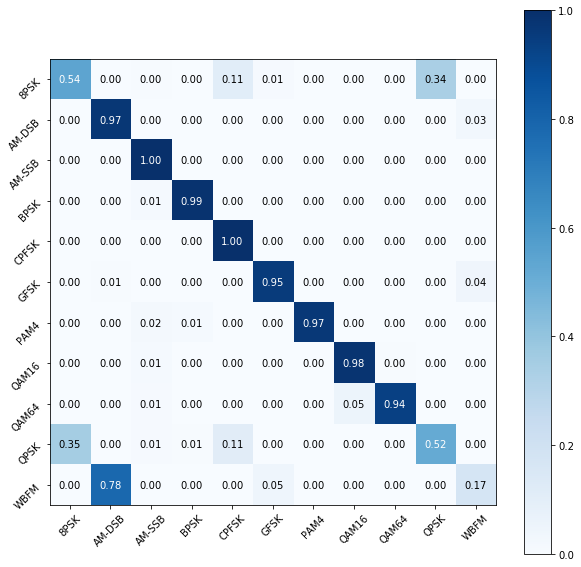

In [9]:
confusion_matrix_create(y_true, y_pred, classes)

In [10]:
with open('./Acc/accuracy.pkl', 'rb') as file:
    data = pickle.load(file, encoding = 'latin')

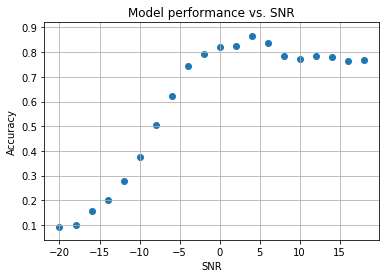

In [11]:
y = []
x = []

for i in range(len(data)):
    x.append(data[i][1])
x = sorted(x)


for i in x:
    for j in range(len(data)):
        if data[j][1]  == i:
            y.append(data[j][0])

plt.scatter(x,y)
#plt.plot(x,y, linestyle = '--', marker = 'o')

plt.title('Model performance vs. SNR')
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [12]:
with open('./history/SNR_8_history.pkl', 'rb') as file:
        data  = pickle.load(file, encoding= 'latin')

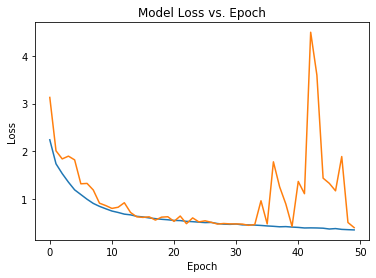

In [13]:
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('Model Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

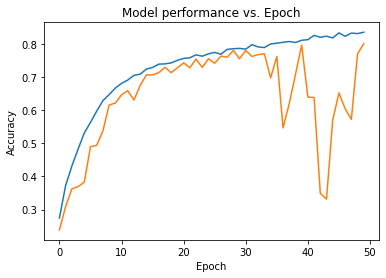

In [14]:
plt.plot(data['accuracy'])
plt.plot(data['val_accuracy'])
plt.title('Model performance vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()